
<H1>PROJET DATA EXPLORATION </h1>
<h3>Youssef Saidi et Lucas Terra</h3>
Dans ce rapport on vas détaillé tout ce qu'on a pu trouver et decouvrir sur un jeux de donnée qui regroupe des informations sur des voitures en effectuant toutes les etudes vue precedament en classe.


<h2>Préparation des données</h2>

Je commence par importer toutes les librairies dont je vais avoir besoin le longs de l'etude.
C'est des librairies basiques qui sont tout le temps utilisé lors d'une etude de data.

In [3]:
%matplotlib widget
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from sklearn.decomposition import PCA   
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv(
    filepath_or_buffer="Jeux/Cars.csv",
    decimal=".", 
    sep=";"
)

In [4]:
print("Sur ce projet on a", dataset.shape[0], "voiture à vendre et accompagné", dataset.shape[1], "caractéristique(variables).")


Sur ce projet on a 193 voiture à vendre et accompagné 25 caractéristique(variables).


In [5]:
dataset.head()

,continent,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,...,peak-rpm,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
0,europe,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,...,5000,21,27,13495,88.6,168.8,64.1,48.8,2548,130
1,europe,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,...,5000,21,27,16500,88.6,168.8,64.1,48.8,2548,130
2,europe,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,...,5000,19,26,16500,94.5,171.2,65.5,52.4,2823,152
3,europe,audi,gas,std,four,sedan,fwd,front,ohc,four,...,5500,24,30,13950,99.8,176.6,66.2,54.3,2337,109
4,europe,audi,gas,std,four,sedan,4wd,front,ohc,five,...,5500,18,22,17450,99.4,176.6,66.4,54.3,2824,136


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          193 non-null    object 
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   engine-type        193 non-null    object 
 9   num-of-cylinders   193 non-null    object 
 10  fuel-system        193 non-null    object 
 11  bore               193 non-null    float64
 12  stroke             193 non-null    float64
 13  compression-ratio  193 non-null    float64
 14  horsepower         193 non-null    int64  
 15  peak-rpm           193 non-null    int64  
 16  city-mpg           193 non

In [7]:
quanti = dataset.select_dtypes(include=["float64", "int64"]).columns
quali = dataset.select_dtypes(include=["object"]).columns

<h2>Analyse univariée</h2>
Maintenant que nos données sont pretes on va commencer par effectuer une Analyse univariée. Pour faire une analise poussé dans cette partie on a utilisé un outils trés puissant de visualisation de donnée qui est PowerBI vous allez trouver ci joint des capture de graphique et ce qu'on en deduit


Je vais commencer par fournir les informations général sur chaque variable

In [8]:
dataset[quanti].describe()

,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352
std,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452
min,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000
25%,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000
50%,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000
75%,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000
max,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000


In [9]:
dataset[quali].describe()

,continent,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,193,193,193,193,193,193,193,193,193,193,193
unique,3,20,2,2,2,5,3,2,5,6,7
top,asie,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,102,32,174,158,112,92,114,190,141,153,88


Ensuite essayons de voir quelque graphique de distrubition interessant

<h2>Analyses bivariées</h2>
<h3>Quantitatif x Quantitatif</h3>
Dans cette partie on vas essayé d'analyser les relations qui a entre les variables. Pour ca on vas afficher des nuages de points de plusieurs paires de variables quantitative qui sont interessant ainsi que leur droite de régression linéaire et ensuite on vas étudier le le coefficient de correlation qui se trouve entre eux.

In [10]:
dataset[quanti]

,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
0,3.47,2.68,9.0,111,5000,21,27,13495,88.6,168.8,64.1,48.8,2548,130
1,3.47,2.68,9.0,111,5000,21,27,16500,88.6,168.8,64.1,48.8,2548,130
2,2.68,3.47,9.0,154,5000,19,26,16500,94.5,171.2,65.5,52.4,2823,152
3,3.19,3.40,10.0,102,5500,24,30,13950,99.8,176.6,66.2,54.3,2337,109
4,3.19,3.40,8.0,115,5500,18,22,17450,99.4,176.6,66.4,54.3,2824,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,3.78,3.15,9.5,114,5400,23,28,16845,109.1,188.8,68.9,55.5,2952,141
189,3.78,3.15,8.7,160,5300,19,25,19045,109.1,188.8,68.8,55.5,3049,141
190,3.58,2.87,8.8,134,5500,18,23,21485,109.1,188.8,68.9,55.5,3012,173
191,3.01,3.40,23.0,106,4800,26,27,22470,109.1,188.8,68.9,55.5,3217,145


In [11]:
data=['price', 'horsepower','engine-size']

for x in data:
    for y in quanti:
        if x!=y:
            print(x+y)

pricebore
pricestroke
pricecompression-ratio
pricehorsepower
pricepeak-rpm
pricecity-mpg
pricehighway-mpg
pricewheel-base
pricelength
pricewidth
priceheight
pricecurb-weight
priceengine-size
horsepowerbore
horsepowerstroke
horsepowercompression-ratio
horsepowerpeak-rpm
horsepowercity-mpg
horsepowerhighway-mpg
horsepowerprice
horsepowerwheel-base
horsepowerlength
horsepowerwidth
horsepowerheight
horsepowercurb-weight
horsepowerengine-size
engine-sizebore
engine-sizestroke
engine-sizecompression-ratio
engine-sizehorsepower
engine-sizepeak-rpm
engine-sizecity-mpg
engine-sizehighway-mpg
engine-sizeprice
engine-sizewheel-base
engine-sizelength
engine-sizewidth
engine-sizeheight
engine-sizecurb-weight


In [54]:
lr.intercept_

array([3.08623758])

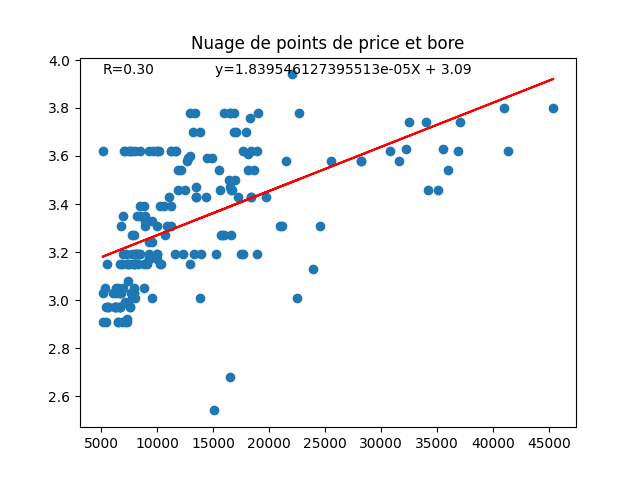

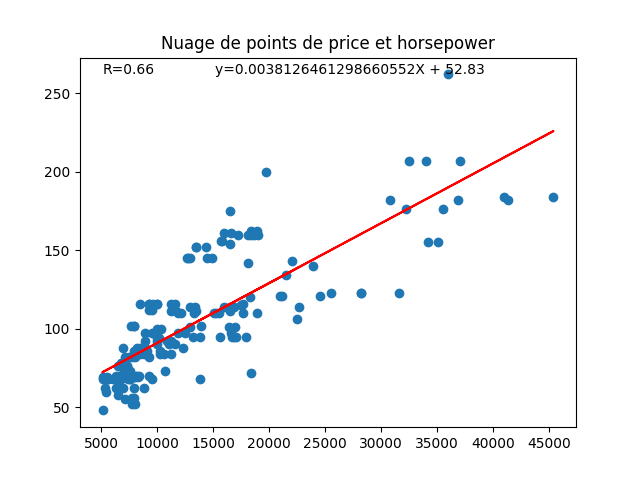

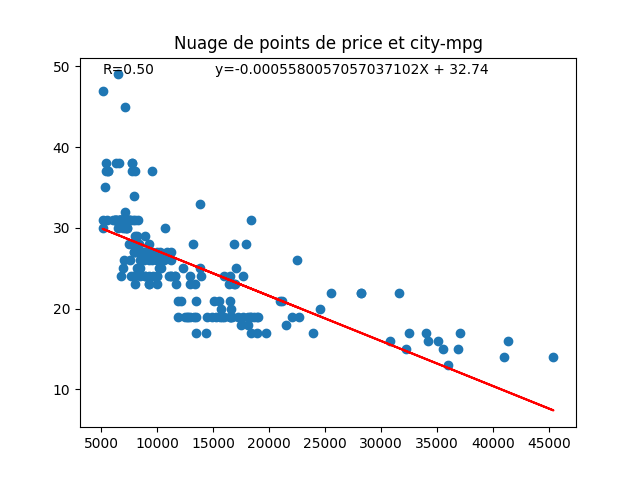

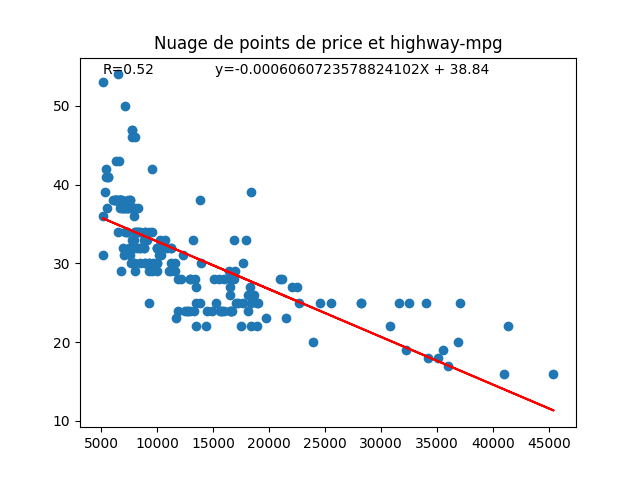

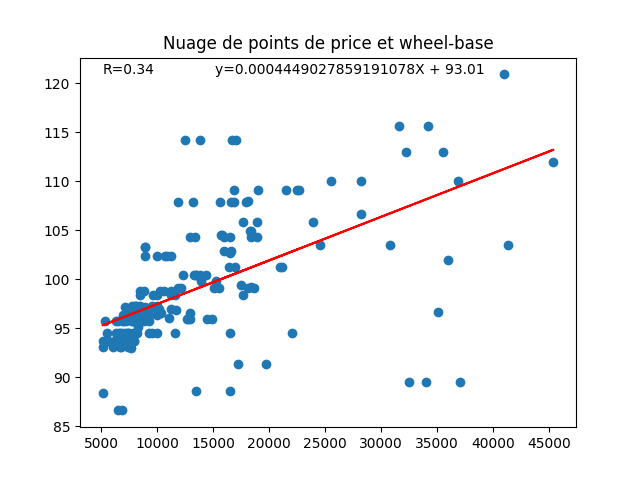

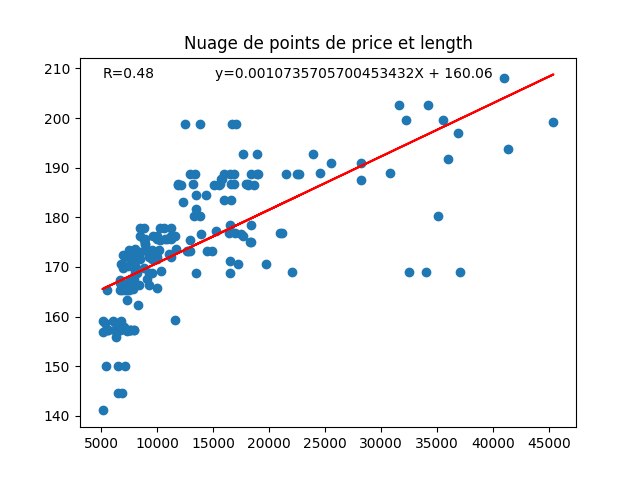

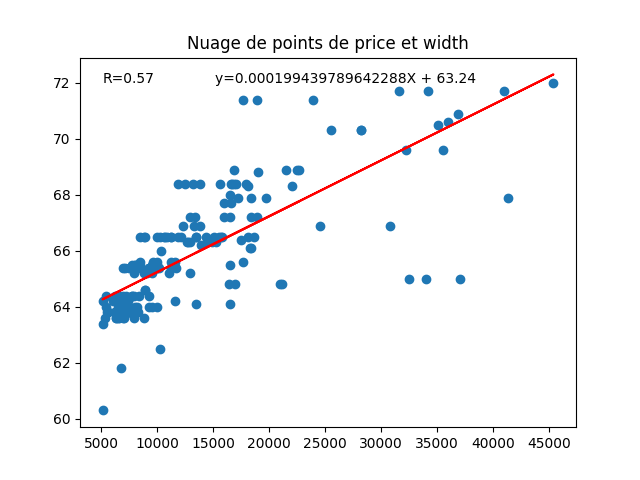

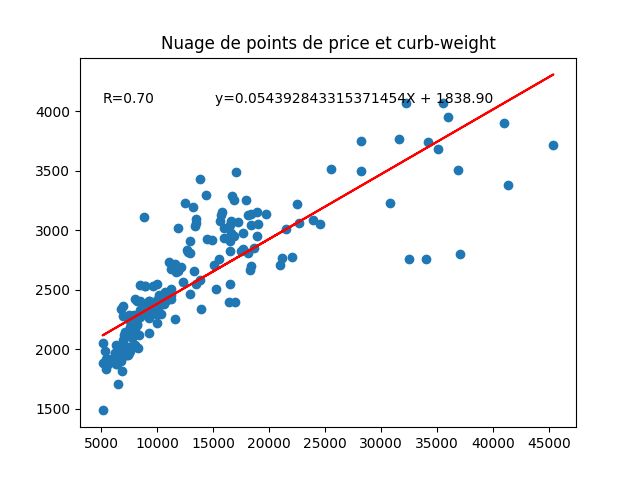

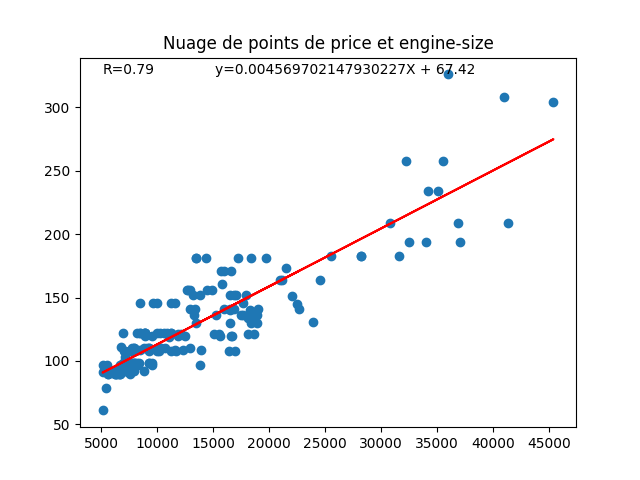

In [85]:
data=['price']

for x in data:
    for y in quanti.drop(["stroke","compression-ratio","peak-rpm","height"]):
        if x!=y:
            lr = LinearRegression()
            X = dataset[x].values.reshape(-1,1)
            Y = dataset[y].values.reshape(-1,1)
            lr.fit(X, Y)
            yPred= lr.predict(X)
            fig = plt.figure()
            plt.scatter(X,Y)
            plt.title("Nuage de points de "+x+" et "+y)
            plt.plot(X, yPred, color='red')
            plt.text(
                x=X.min(),
                y=Y.max(),
                s="R="+format(lr.score(X,Y),".2f"),
                fontsize=10
            )
            plt.text(
                x=X.max()/3,
                y=Y.max(),
                s="y=" + str(lr.coef_[0][0]) + "X + "+format(lr.intercept_[0],".2f"),
                fontsize=10
            )
            plt.show()
            

In [13]:
array = dataset[quanti].values[:]
cor = dataset.corr(numeric_only=True)

cor.style.background_gradient(cmap='coolwarm')

,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
bore,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854
stroke,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518
compression-ratio,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257
horsepower,0.572972,0.102913,-0.203818,1.000000,0.101383,-0.833615,-0.812078,0.812453,0.377040,0.589650,0.621532,-0.081730,0.762154,0.845325
peak-rpm,-0.273766,-0.068420,-0.439741,0.101383,1.000000,-0.061032,-0.008412,-0.103835,-0.350823,-0.276144,-0.247612,-0.257334,-0.278528,-0.217769
city-mpg,-0.601369,-0.031248,0.314648,-0.833615,-0.061032,1.000000,0.971975,-0.706618,-0.504499,-0.702143,-0.657153,-0.111166,-0.777763,-0.716378
highway-mpg,-0.608804,-0.040274,0.249669,-0.812078,-0.008412,0.971975,1.000000,-0.719178,-0.571771,-0.731264,-0.702009,-0.159850,-0.818104,-0.737531
price,0.546295,0.096007,0.074483,0.812453,-0.103835,-0.706618,-0.719178,1.000000,0.584951,0.695928,0.754649,0.136234,0.835368,0.888778
wheel-base,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375
length,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998


In [65]:
dataset2 = dataset.drop(columns=["stroke","compression-ratio","peak-rpm"])
cor2 = dataset2.corr(numeric_only=True)
cor2.style.background_gradient(cmap='coolwarm')

,bore,horsepower,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
bore,1.000000,0.572972,-0.601369,-0.608804,0.546295,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854
horsepower,0.572972,1.000000,-0.833615,-0.812078,0.812453,0.377040,0.589650,0.621532,-0.081730,0.762154,0.845325
city-mpg,-0.601369,-0.833615,1.000000,0.971975,-0.706618,-0.504499,-0.702143,-0.657153,-0.111166,-0.777763,-0.716378
highway-mpg,-0.608804,-0.812078,0.971975,1.000000,-0.719178,-0.571771,-0.731264,-0.702009,-0.159850,-0.818104,-0.737531
price,0.546295,0.812453,-0.706618,-0.719178,1.000000,0.584951,0.695928,0.754649,0.136234,0.835368,0.888778
wheel-base,0.495957,0.377040,-0.504499,-0.571771,0.584951,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375
length,0.606373,0.589650,-0.702143,-0.731264,0.695928,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998
width,0.541633,0.621532,-0.657153,-0.702009,0.754649,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903
height,0.182445,-0.081730,-0.111166,-0.159850,0.136234,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906
curb-weight,0.645070,0.762154,-0.777763,-0.818104,0.835368,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188


<h3> Quali x Quanti</h3>

<h3> Quali x Quali</h3>

On remarque que en asie il y a autant de voiture a deux porte que a quatre c'est aussi le cas aux USA mais on ne peut pas generalisé etant donné le trés peux d'enregistrement qu'on a. Alors qu'on europe les gens ont plus tendance a achété des voitures a quatre porte que a deux porte. On peut donc supposer qu'on europe les voitures a deux portes ne sont pas trés...

On a partout

In [116]:
from scipy.stats import chi2_contingency
for x in quali:
    for y in quali[quali.get_loc(x):]:
        if x!=y:
            data = pd.crosstab(dataset[x],dataset[y])
            stat, p, dof, expected = chi2_contingency(data)
            alpha = 0.1
            print(x+" "+y+" : ")
            print("p value is " + str(p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (H0 holds true)')
            
            
data

continent make : 
p value is 3.606805835387796e-59
Dependent (reject H0)
continent fuel-type : 
p value is 0.002072134368923454
Dependent (reject H0)
continent aspiration : 
p value is 0.006299393950374127
Dependent (reject H0)
continent num-of-doors : 
p value is 0.043257735597591246
Dependent (reject H0)
continent body-style : 
p value is 9.535800297958033e-06
Dependent (reject H0)
continent drive-wheels : 
p value is 1.3109438867563785e-09
Dependent (reject H0)
continent engine-location : 
p value is 0.07725559297051544
Dependent (reject H0)
continent engine-type : 
p value is 0.0006545941279979408
Dependent (reject H0)
continent num-of-cylinders : 
p value is 1.6109527583675823e-06
Dependent (reject H0)
continent fuel-system : 
p value is 7.074913418604729e-18
Dependent (reject H0)
make fuel-type : 
p value is 0.0002932518637524795
Dependent (reject H0)
make aspiration : 
p value is 0.00010097829643147696
Dependent (reject H0)
make num-of-doors : 
p value is 0.00937310978447623
Dep

fuel-system,1bbl,2bbl,idi,mfi,mpfi,spdi,spfi
num-of-cylinders,,,,,,,
eight,0,0,0,0,4,0,0
five,0,0,4,0,6,0,0
four,11,63,14,1,54,9,1
six,0,0,1,0,23,0,0
three,0,1,0,0,0,0,0
twelve,0,0,0,0,1,0,0


<h3>Analyse multivariée</h3>

In [15]:
# on standardise nos données :



values = StandardScaler().fit_transform(array)
values

array([[ 0.51302731, -1.80818563, -0.28827253, ..., -2.12259761,
        -0.02571274,  0.04521533],
       [ 0.51302731, -1.80818563, -0.28827253, ..., -2.12259761,
        -0.02571274,  0.04521533],
       [-2.39482676,  0.70291796, -0.28827253, ..., -0.61541231,
         0.497764  ,  0.57555862],
       ...,
       [ 0.91791839, -1.20424932, -0.33868626, ...,  0.6824417 ,
         0.85753529,  1.0817954 ],
       [-1.18015354,  0.48041511,  3.24068891, ...,  0.6824417 ,
         1.24776341,  0.40681302],
       [ 1.65408397, -0.31423793, -0.16223819, ...,  0.6824417 ,
         0.95271288,  0.31038697]])

In [16]:
print(pearsonr(values[:,1], values[:,4]))

PearsonRResult(statistic=-0.06841959580719013, pvalue=0.344429572173001)


In [17]:
model_acp=PCA(0.8)

acp = model_acp.fit_transform(values)
acp.shape

(193, 4)

In [18]:
model_acp.explained_variance_ratio_


array([0.53961228, 0.16018715, 0.08704088, 0.06524487])

In [19]:
comp1 = acp[:,0]
comp2 = acp[:,1]
comp3 = acp[:,2]
pearsonr(comp1, comp2)

PearsonRResult(statistic=-9.611452259083997e-17, pvalue=1.0000000000000806)

In [20]:
model_acp.explained_variance_

array([7.5939187 , 2.25430048, 1.22491899, 0.91818558])

In [21]:
model_acp.explained_variance_ratio_

array([0.53961228, 0.16018715, 0.08704088, 0.06524487])

In [22]:
model_acp.explained_variance_ratio_.cumsum()

array([0.53961228, 0.69979944, 0.78684031, 0.85208518])

In [23]:
model_acp.n_components_

4

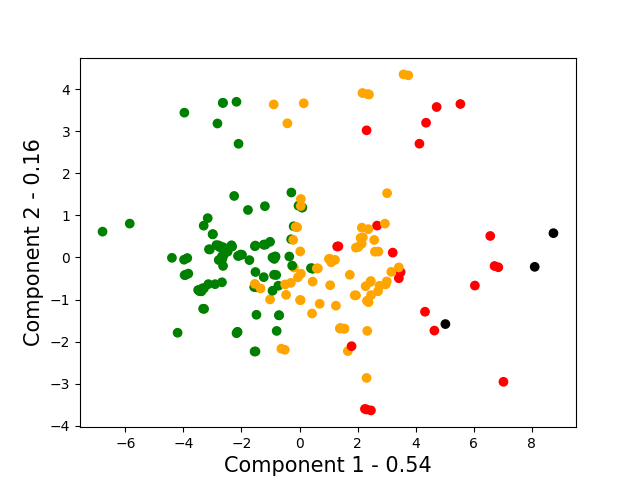

In [87]:
def mapc(p):
    mapping = [(10000, "green"), (20000, "orange"), (40000, "red"),(50000, "black")] # Add all your values and returns here
    c = []
    for i in p:
        for check, value in mapping:
            if int(i) <= check:
                c.append(value)
                break
    return c
fig = plt.figure()
plt.xlabel('Component 1 - '+format(model_acp.explained_variance_ratio_[0],'.2f'),fontsize=15)
plt.ylabel('Component 2 - '+format(model_acp.explained_variance_ratio_[1],'.2f'),fontsize=15)        
plt.scatter(comp1,comp2,c=mapc(dataset["price"]))
plt.show()

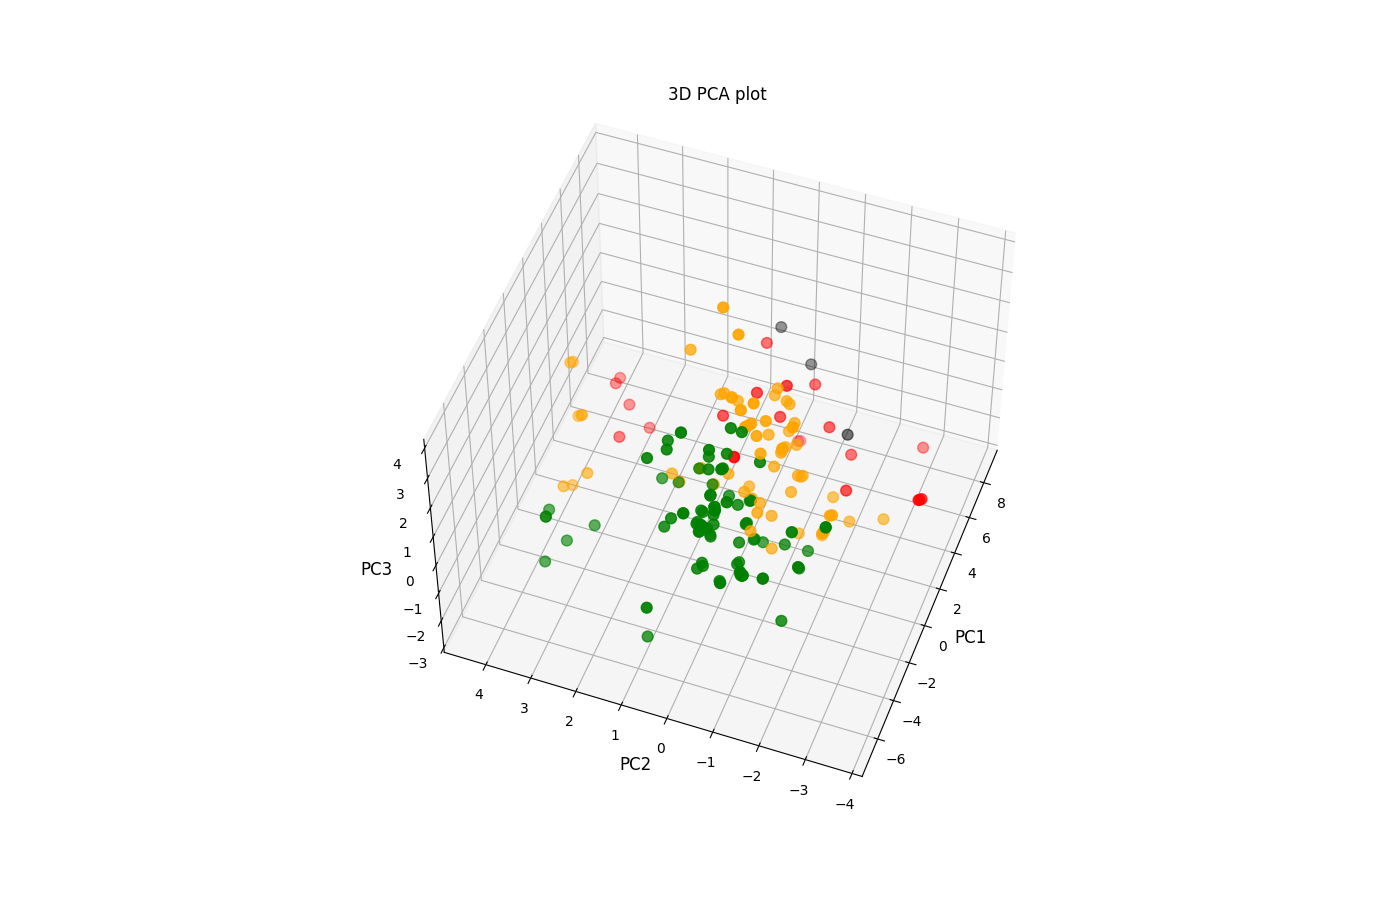

In [25]:

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, 
                     projection='3d')
 
ax.scatter(comp1, 
            comp2, 
            comp3, 
            c=mapc(dataset["price"]),
            s=60)
 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(50, 200)
plt.title("3D PCA plot")
plt.show()  